In [1]:
###
# This is a code for solving the inviscid Burgers’ equation and its automatic optimizer. We employ SVV(The spectral vanishing viscosity method)
# to solve the PDE problem. Then we use Sequential Least Squares Programming(SLSQP) to optimize parameters(Qk) and find the best Qk for the
# equation. 
###

In [2]:
# import the function we use
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft, ifft, fftfreq
from scipy.optimize import minimize

# the visualization function 
def doplot(x, y, i):
    plt.clf()
    plt.plot(x, y, 'r-')
    plt.xlim(0, 2.0*np.pi)
    plt.ylim(-1.1, 1.1)
    plt.savefig('out-%04d.png' % i)

def plot_result(x, y_pred, y_true, i):
    plt.clf()
    plt.plot(x,y_pred,'x')
    plt.plot(x, y_true, 'r-')
    plt.xlim(0, 2.0*np.pi)
    plt.ylim(-1.1, 1.1)
    plt.savefig('out-%04d.png' % i)

# import the exact solution of the inviscid Burgers’ equation
y_true = np.loadtxt('exact solution.txt')

0
10
20
30
40
50
60
70
80
90


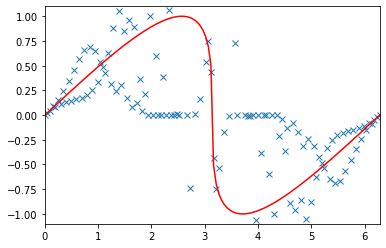

In [3]:
## solving the inviscid Burgers’ equation with SVV
# In this code, you can change the value of 'cutoff', 'eps' and 'add_svv' to get different results. 
# The output will be stored as a series of images in current directory.


## Simulation parameters
n = 128           # Number of grid points in x-direction
dt = 0.01         # Timestep size
nt = 100        # Number of timesteps to peform
add_svv = True   # Whether to add spectral vanishing viscosity

# SVV parameters: cutoff mode, epsilon.
cutoff = int(2*np.sqrt(n))
eps = 0.5

## Setup
# Create points for the simulation: equally-spaced points that are dx positions apart. 
x = np.linspace(0, 2*np.pi, n, endpoint=True)
# Calculate grid spacing.
dx = x[1]-x[0]
u0 = np.sin(x)
y_pred= u0
# Calculate FFT frequencies.
k = fftfreq(n, dx)
for i in range(nt):
    if i %10 == 0:
        print(i)
    ufft = fft(u0)
    deriv = ifft(2*np.pi*k*1j*ufft).real
    u0 -=dt*u0*deriv

    if add_svv:
        Qk = np.exp(-(k-n)**2/(k-cutoff)**2)
        u0 -=dt*eps*ifft(4*np.pi*np.pi*k*k*Qk*ufft).real
    y_pred = np.concatenate((y_pred,u0))

# results visualization
# the red line represent the exact solution, while the blue 'x' shows the result of SVV
for i in range(nt):
    plot_result(x,y_pred[i*128:(i+1)*128],y_true[i*128:(i+1)*128],i)

In [4]:
## use Sequential Least Squares Programming(SLSQP) to optimize parameters(Qk)
# In this code, you can change the initialize value of 'cutoff', 'eps' to get different results. 
# The output will be stored as a series of images in current directory.

n = 128           # Number of grid points in x-direction
dt = 0.01         # Timestep size
nt = 100          # Number of timesteps to peform
add_svv = True   # Whether to add spectral vanishing viscosity


## Setup
# Create points for the simulation: equally-spaced points that are dx positions apart.
x = np.linspace(0, 2*np.pi, n, endpoint=True)

# Calculate grid spacing.
dx = x[1]-x[0]

# Calculate FFT frequencies.
k = fftfreq(n, dx)


def solve_burgers(Qk):

    # Initial condition.
    u0 = np.sin(x)
    pred = u0
    # Main timestepping loop.
    for i in range(nt-1):
        # First, FFT u
        ufft = fft(u0)
        # Calculate the derivative of u, du/dx.
        deriv = ifft(2*np.pi * k*1j * ufft).real
        # Forward Euler timestepping
        u0 -= dt * u0 * deriv
        # make Qk the vector of optimisation coefficients
        u0 -= dt * eps * ifft(4 * np.pi * np.pi * k*k * Qk * ufft).real
        pred = np.concatenate((pred,u0))
    loss= np.linalg.norm(pred-y_true) #loss represent the error between exact solution and the result of SVV
    print(loss)
    return loss

# Initialize the eps and cutoff
# cutoff = int(5 * np.sqrt(n))
# eps    = 0.5
cutoff = int(2*np.sqrt(n))
eps = 0.5
# minimize(solve_burgers, np.exp(-(k-n)**2 / (k - cutoff)**2),method='TNC')
# use Sequential Least Squares Programming(SLSQP) to optimize parameters(Qk)
res = minimize(solve_burgers, np.exp(-(k-n)**2 / (k - cutoff)**2),method='SLSQP') 
print(res)

62.43165761305161
62.43165761305161
62.43165700641139
62.43165781025829
62.43165798246828
62.4316576537322
62.431657604225165
62.43165764754246
62.43165773781494
62.431658066152764
62.43165822229366
62.43165787549006
62.431657891628745
62.43165916576732
62.431660011461105
62.43165874557333
62.43165954129403
62.431660972957246
62.43166057660822
62.431661133577904
62.43166289009301
62.43166107728003
62.43165932949744
62.431662108731196
62.4316638462729
62.4316611818295
62.43166123870081
62.43166139139033
62.43166019623312
62.43166311077651
62.4316635806558
62.43165700680647
62.43165808980314
62.43166026160368
62.43165558712261
62.431655458920154
62.431655521672745
62.431651370580674
62.43165663021084
62.431653949667776
62.43164617340906
62.43165786807837
62.4316577743983
62.431645515593104
62.431656184763426
62.43164589142983
62.431634715522854
62.43165376933001
62.431635470120426
62.43159566736931
62.43161779788325
62.431605025781295
62.43157436813585
62.43162745820695
62.43159763395629

d:\Anaconda\envs\RL\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply


7.112401301100946
7.1124012996248736
7.1124013003935636
7.112401300325277
7.112401301634375
7.112401296141028
7.112401307494425
7.112401291019337
7.112401308371911
7.112401299223049
7.112401291041699
7.112401319058875
7.112401283938166
7.112401294587179
7.112401340421546
7.112401230346374
7.112401356390171
7.1124013232228975
7.1124011683676835
7.11240148026844
7.112401226003467
7.112401095167966
7.112401775330485
7.11240091087668
7.112401061366089
7.112402371249745
7.112400187092726
7.11240088394065
7.112403811360113
7.112398908757228
7.112399389094513
7.112406688566832
7.112399008042492
7.112394520281732
7.112408840228009
7.1124041762917445
7.112387519987986
7.112399345851634
7.112407542519101
7.112392009338352
7.112394173395722
7.112407895133686
7.112400618516228
7.112388896645807
7.11239056474229
7.112389809567993
7.112393583432153
7.1124008302751
7.112401294609055
7.1124008302750745
7.11239358343214
7.112389809569646
7.112390564742277
7.112388896645845
7.112400618516238
7.112407895

d:\Anaconda\envs\RL\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
d:\Anaconda\envs\RL\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


0.7308808268401941
0.7308808270645721
0.7308808273146408
0.7308808248692426
0.7308808277515702
0.7308808249480109
0.7308808265185288
0.7308808252051693
0.7308808245469572
0.730880823458283
0.7308808298918306
0.7308808188315105
0.7308808336721271
0.7308808285267444
0.7308808134546945
0.7308808172793938
0.7308808684887546
0.730880779565647
0.7308808558876443
0.7308808306211052
0.7308807105914455
0.7308807379117398
0.7308808843916074
0.7308808234738517
0.7308808354536158
0.7308806957794239
0.7308806170695249
0.7308809304941315
0.7308810737112823
0.730880447399315
0.7308805565483325
0.7308813383780031
0.7308802684741452
0.7308795916304859
0.7308815196573493
0.730882269294565
0.730880679529096
0.7308800600287905
0.7308811550891131
0.73088108078537
0.7308799881625492
0.7308800987252208
0.7308813354963822
0.7308813599136287
0.7308805658567338
0.7308804244854713
0.7308808895629975
0.7308807783928084
0.7308808895629979
0.7308804244854713
0.7308805658567338
0.7308813599136287
0.7308813354963822


d:\Anaconda\envs\RL\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in subtract


0.6252751579593032
0.6252751594086604
0.6252751584029337
0.6252751603338615
0.6252751592518724
0.6252751610290871
0.6252751593287731
0.6252751577771206
0.6252751604276084
0.6252751618618703
0.6252751585747127
0.6252751616854605
0.6252751600713521
0.6252751610935712
0.6252751597053546
0.6252751617534434
0.6252751590500513
0.6252751504504632
0.6252751675127123
0.6252751631112075
0.6252751240773554
0.6252751933881842
0.6252751543971006
0.6252750492793582
0.6252752076140082
0.6252752498780516
0.6252750577548147
0.6252751024175118
0.6252752483700772
0.6252751141646009
0.6252750452758841
0.6252751585102745
0.625275143541608
0.6252750706370812
0.6252752430885952
0.6252750851473461
0.6252748359654103
0.6252752138869515
0.6252755674749264
0.6252751721368709
0.6252748848526392
0.6252752286394329
0.6252751676696043
0.6252747536895326
0.6252749640296114
0.6252754068757581
0.6252752508183779
0.6252749427981165
0.6252751054138073
0.6252752267910616
0.6252751779302439
0.6252752267910733
0.62527510541

0
10
20
30
40
50
60
70
80
90
100


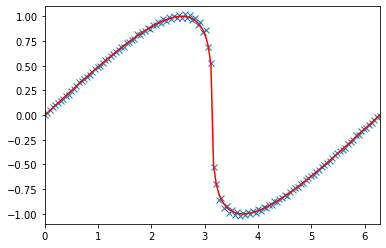

In [5]:
## use the optimized parameters to solve the equation

n = 128           # Number of grid points in x-direction
dt = 0.01         # Timestep size
nt = 110        # Number of timesteps to peform
# SVV parameters: cutoff mode, epsilon.
cutoff = int(5*np.sqrt(n))
eps = 0.5

## Setup
# Create points for the simulation: equally-spaced points that are dx positions apart.
x = np.linspace(0, 2*np.pi, n, endpoint=True)
# Calculate grid spacing.
dx = x[1]-x[0]
u0 = np.sin(x)
y_pred = u0
# Calculate FFT frequencies.
k = fftfreq(n, dx)
for i in range(nt):
    if i %10 == 0:
        print(i)
    ufft = fft(u0)
    deriv = ifft(2*np.pi*k*1j*ufft).real
    u0 -=dt*u0*deriv
    Qk = res.x
    u0 -=dt*eps*ifft(4*np.pi*np.pi*k*k*Qk*ufft).real
    y_pred = np.concatenate((y_pred,u0))

#visualzation
x = np.linspace(0, 2*np.pi, 128, endpoint=True)
nt = 100
for i in range(nt):
    plot_result(x,y_pred[i*128:(i+1)*128],y_true[i*128:(i+1)*128],i)
